# Паттерн __Строитель__

это порождающий паттерн проектирования, который позволяет создавать сложные объекты пошагово. Строитель даёт возможность использовать один и тот же код строительства для получения разных представлений объектов.

## Проблема:
Представьте сложный объект, требующий кропотливой пошаговой инициализации множества полей и вложенных объектов. Код инициализации таких объектов обычно спрятан внутри монструозного конструктора с десятком параметров. Либо ещё хуже — распылён по всему клиентскому коду.

## Объекты участники:
1. Продукт 
-  сложный объект, который необходимо "построить"
2. Строитель 
- интерфейс строителей для создания частей продукта
3. Конкретный строитель 
- создает и собирает конкретную часть Продукта, реализуя интерфейс Строителя
- предоставляет доступ к результату "строительства"
4. Директор (не является обязательным)
- директор будет задавать порядок шагов строительства, а строитель — выполнять их. Директор полезен, если у вас есть несколько способов конструирования продуктов, отличающихся порядком и наличием шагов конструирования. В этом случае вы сможете объединить всю эту логику в одном классе.

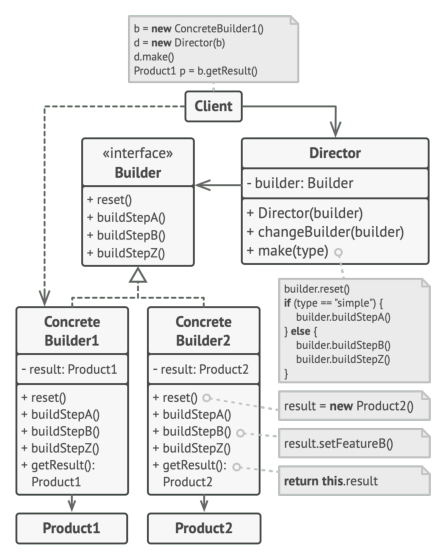

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(19,10))
plt.axis('off')
img=mpimg.imread('/Users/daniilbairachnyi/Downloads/structure-2x.png')
imgplot = plt.imshow(img)

## Пример

In [17]:
class Meal: # Продукт
    def __init__(self):
        
        self.content = {
            "Первое": None,
            "Второе": None,
            "Салат": None,
            "Десерт": None,
        }
        
    def __str__(self):
        return f'Первое блюдо:{self.content["Первое"]}\nВторое блюдо:{self.content["Второе"]}\nСалат:{self.content["Салат"]}\nДесерт:{self.content["Десерт"]}'

In [40]:
from abc import ABC, abstractmethod, abstractproperty

class MealBuilder(ABC): # Интерфейс строителя
    
    @abstractproperty
    def product(self):
        pass
    
    @abstractmethod
    def soup(self):
        pass
    
    @abstractmethod
    def salad(self):
        pass
    
    @abstractmethod
    def main_course(self):
        pass
    
    @abstractmethod
    def desert(self):
        pass
    

class MealOne(MealBuilder): # Строитель 1
    def __init__(self):
        """
        Новый экземпляр строителя должен содержать пустой объект продукта,
        который используется в дальнейшей сборке.
        """
        self.reset()

    def reset(self):
        self._product = Meal()
        
    @property
    def product(self) -> Meal:
        product = self._product
        self.reset()
        return product
    
    def soup(self):
        self._product.content['Первое'] = 'Харчо'
        
    def main_course(self):
        self._product.content['Второе'] = "Шницель с пюре"
        
    def salad(self):
        self._product.content['Салат'] = "Цезарь"
    
    def desert(self):
        self._product.content['Десерт'] = "Имбирное печенье"

        

class MealTwo(MealBuilder): # Строитель 2
    def __init__(self):
        """
        Новый экземпляр строителя должен содержать пустой объект продукта,
        который используется в дальнейшей сборке.
        """
        self.reset()

    def reset(self):
        self._product = Meal()
        
    @property
    def product(self) -> Meal:
        product = self._product
        print('Сброс продукта')
        self.reset()
        return product
    
    @product.setter
    def product(self, prod: Meal):
        self._product = prod
    
    def soup(self):
        self._product.content['Первое'] = 'Борщ'
        
    def main_course(self):
        self._product.content['Второе'] = "Хинкали с говядиной"
        
    def salad(self):
        self._product.content['Салат'] = "Сельд под шубой"
    
    def desert(self):
        self._product.content['Десерт'] = "Пирожное 'Картошка'"
        

class MealThree(MealBuilder): # Строитель 3
    def __init__(self):
        """
        Новый экземпляр строителя должен содержать пустой объект продукта,
        который используется в дальнейшей сборке.
        """
        self.reset()

    def reset(self):
        self._product = Meal()
        
    @property
    def product(self) -> Meal:
        product = self._product
        self.reset()
        return product
    
    @product.setter
    def product(self, prod: Meal):
        self._product = prod
    
    def soup(self):
        self._product.content['Первое'] = 'Гороховый'
        
    def main_course(self):
        self._product.content['Второе'] = "Карбонара"
        
    def salad(self):
        self._product.content['Салат'] = "Крабовый"
    
    def desert(self):
        self._product.content['Десерт'] = "Булочка с корицей"

In [41]:
class Order: # Директор
    def __init__(self):
        self._builder = None

    @property
    def builder(self) -> MealBuilder:
        return self._builder

    @builder.setter
    def builder(self, builder: MealBuilder):
        self._builder = builder
    
    def full_charge(self):
        self._builder.soup()
        self._builder.main_course()
        self._builder.salad()
        self._builder.desert()
    
    def diet(self):
        self._builder.soup()
        self._builder.main_course()
        self._builder.salad()
        
    def strict_diet(self):
        self._builder.soup()
        self._builder.main_course()

C использованием директора

In [42]:
if __name__ == '__main__':
    waiter = Order() # Director
    
    meal1 = MealOne() # Builder1
    meal2 = MealTwo() # Builder2
    meal3 = MealThree() # Builder3
    
    waiter.builder = meal1
    waiter.full_charge()
    
    waiter.builder = meal2
    waiter.diet()
    
    waiter.builder = meal3
    waiter.strict_diet()
    
    print('Гость1')
    print(meal1._product)
    
    print('\nГость2')
    print(meal2._product)
    
    print('\nГость3')
    print(meal3._product)

Гость1
Первое блюдо:Харчо
Второе блюдо:Шницель с пюре
Салат:Цезарь
Десерт:Имбирное печенье

Гость2
Первое блюдо:Борщ
Второе блюдо:Хинкали с говядиной
Салат:Сельд под шубой
Десерт:None

Гость3
Первое блюдо:Гороховый
Второе блюдо:Карбонара
Салат:None
Десерт:None


Вызов напрямую из строителя (без использования директора)

In [50]:
builder = MealOne() # Builder1
builder2 = MealTwo() # Builder2
builder3 = MealThree() # Builder1

In [51]:
builder.soup()
meal1 = builder._product
print(meal1)

Первое блюдо:Харчо
Второе блюдо:None
Салат:None
Десерт:None


In [52]:
builder3.main_course()
builder3.soup()
print(builder3._product)

Первое блюдо:Гороховый
Второе блюдо:Карбонара
Салат:None
Десерт:None


In [53]:
builder2.main_course()
builder2.soup()
builder2.desert()
print(builder2._product)

Первое блюдо:Борщ
Второе блюдо:Хинкали с говядиной
Салат:None
Десерт:Пирожное 'Картошка'


С использованием различных строителей

In [57]:
builder2._product = meal1
builder2.main_course()
print(builder2._product)

Первое блюдо:Харчо
Второе блюдо:Хинкали с говядиной
Салат:None
Десерт:None


## Преимущества
* Позволяет создавать продукты пошагово.
* Позволяет использовать один и тот же код для создания различных продуктов.
* Изолирует сложный код сборки продукта от его основной бизнес-логики.

## Недостатки
* Усложняет код программы из-за введения дополнительных классов.
* Клиент будет привязан к конкретным классам строителей, так как в интерфейсе директора может не быть метода получения результата.